In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [151]:
# Read in the csv file as a pandas dataset

bikes = pd.read_csv("D:/Catalin/Portofolio/Projects/bike sharing london/archive/london_merged.csv")

In [152]:
# Explore the data

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [153]:
bikes.shape

(17414, 10)

In [154]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [155]:
# Count the unique values in the weather_code column

bikes.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [156]:
# Count the unique values in the season column

bikes.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [157]:
# Specifying the column names that I want to use with the help of a dictionary

new_cols_dict = {
    "timestamp":"time",
    "cnt":"count",
    "t1":"temp_real_C",
    "t2":"temp_feels_like_C",
    "hum":"humidity_percent",
    "wind_speed":"wind_speed_kph",
    "weather_code":"weather",
    "is_holiday":"is_holiday",
    "is_weekend":"is_weekend",
    "season":"season"
}

# Renaming the columns to the specified column names

bikes.rename(new_cols_dict, axis = 1, inplace = True)

In [158]:
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [159]:
# Change the humidity values to percentage (values between 0 and 1)

bikes.humidity_percent = bikes.humidity_percent / 100

In [160]:
# Creating a season dictionary so that we can map the integers 0-3 to the actual written values

season_dict = {
    "0.0":"spring",
    "1.0":"summer",
    "2.0":"autumn",
    "3.0":"winter"
}

# Creating a weather dictionary in order to map the integers to the actual written values

weather_dict = {
    "1.0":"Clear",
    "2.0":"Scattered clouds",
    "3.0":"Broken clouds",
    "4.0":"Cloudy",
    "7.0":"Rain",
    "10.0":"Rain with thunderstorm",
    "26.0":"Snowfall"
}

# Changing the season and weather columns data types to string

bikes[['season', 'weather']] = bikes[['season', 'weather']].astype(str)

# Mapping the values

bikes.season = bikes.season.map(season_dict)

bikes.weather = bikes.weather.map(weather_dict)

In [161]:
# Checking the dataframe to see if the mapping procedure was successfull
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [162]:
# Writing the dataframe to an excel file that we will use for Tableau visualization

bikes.to_excel("london_bikes_final.xlsx", sheet_name="Data")

# Goal from now on: predicting future bike shares

## 1. Data Cleaning and Preprocessing

In [163]:
# First, creating a new time_of_day variable based on the timestamp variable

# Convert time variables to timestamp format
bikes['time'] = pd.to_datetime(bikes['time'])
                             
# Extract the hour component from the timestamp
bikes['hour'] = bikes['time'].dt.hour

# Define time of day categories
morning_mask = (bikes['hour'] >= 6) & (bikes['hour'] < 12)
afternoon_mask = (bikes['hour'] >= 12) & (bikes['hour'] < 18)

# Assign labels based on categories
bikes.loc[morning_mask, 'time_of_day'] = 'morning'
bikes.loc[afternoon_mask, 'time_of_day'] = 'afternoon'
bikes.loc[~morning_mask & ~afternoon_mask, 'time_of_day'] = 'night'

# Drop the intermediate 'hour' column if you don't need it anymore
bikes.drop('hour', axis=1, inplace=True)

In [164]:
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,time_of_day
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,night
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,night
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,night
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,night
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,night


In [165]:
# Change index to timestamp
bikes = bikes.set_index("time")

In [166]:
# Check for missing values
print(bikes.isnull().sum()) # No missing values

count                0
temp_real_C          0
temp_feels_like_C    0
humidity_percent     0
wind_speed_kph       0
weather              0
is_holiday           0
is_weekend           0
season               0
time_of_day          0
dtype: int64


In [167]:
# Check for duplicate records

print(bikes.duplicated().sum()) # no duplicates 

2


In [168]:
# Check for any possible inconsistancies

bikes.describe()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,0.723250,15.913063,0.022051,0.285403
std,1085.108068,5.571818,6.615145,0.143132,7.894570,0.146854,0.451619
min,0.000000,-1.500000,-6.000000,0.205000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,0.630000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,0.745000,15.000000,0.000000,0.000000
75%,1671.750000,16.000000,16.000000,0.830000,20.500000,0.000000,1.000000
max,7860.000000,34.000000,34.000000,1.000000,56.500000,1.000000,1.000000


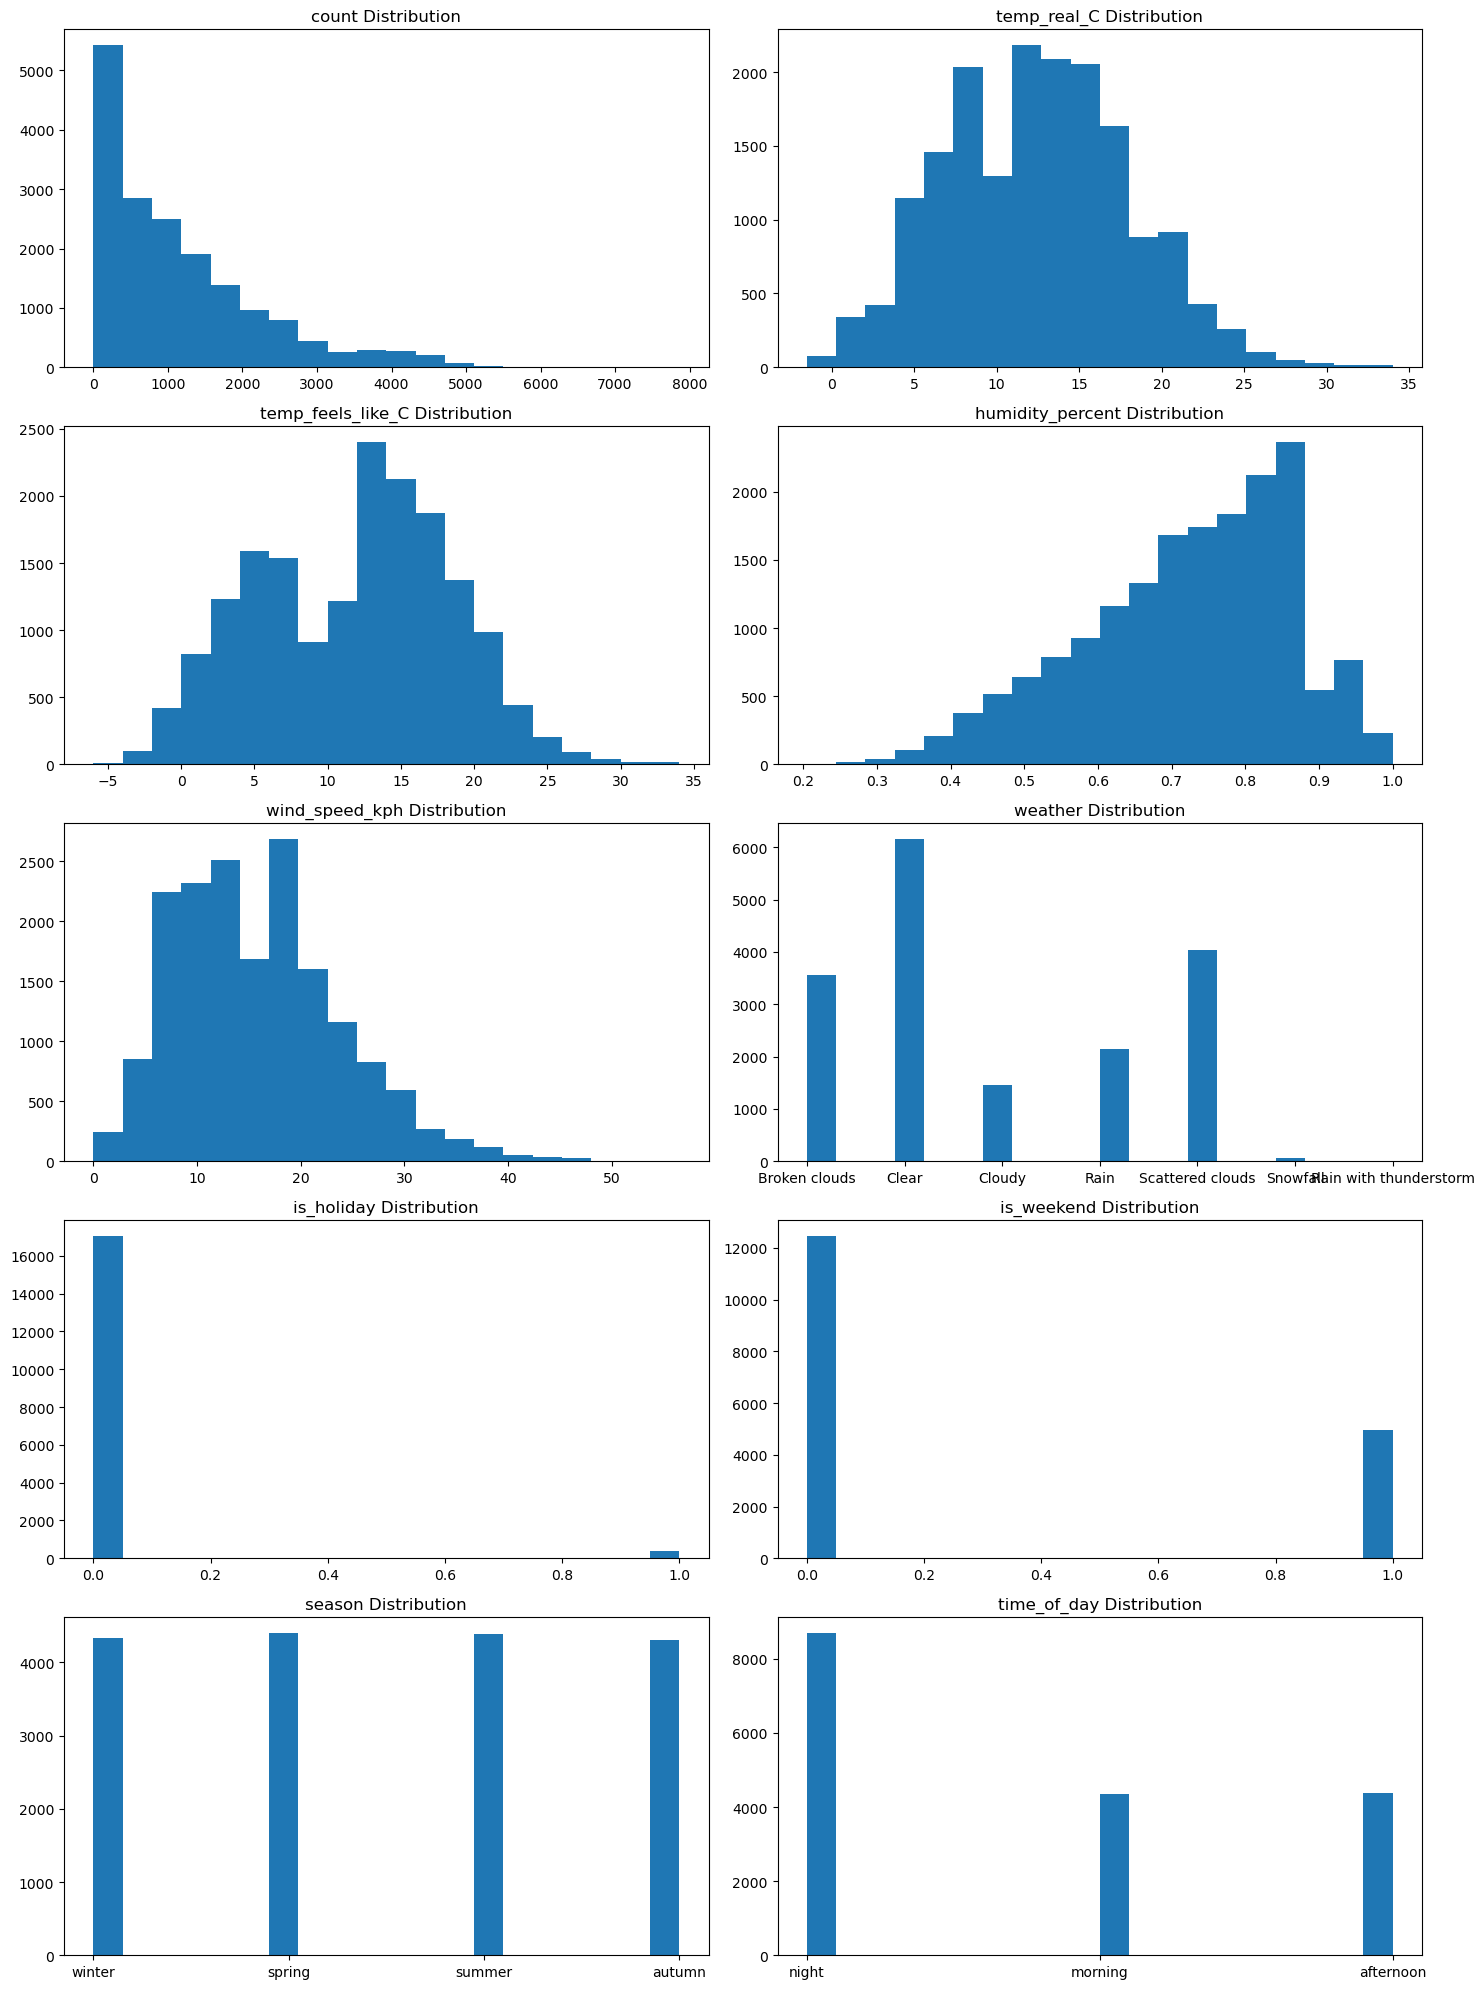

In [169]:
# Looking further with the help of histograms and scatterplots

# create a 5 x 2 grid of subplots 
fig, axs = plt.subplots(5,2, figsize = (15,20))

# flatten array to make easier to access each subplot
axs = axs.ravel()

# loop over each column in the dataframe and plot a histogram
for i,column in enumerate(bikes.columns):
    axs[i].hist(bikes[column], bins = 20)
    axs[i].set_title('{} Distribution'.format(column))
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


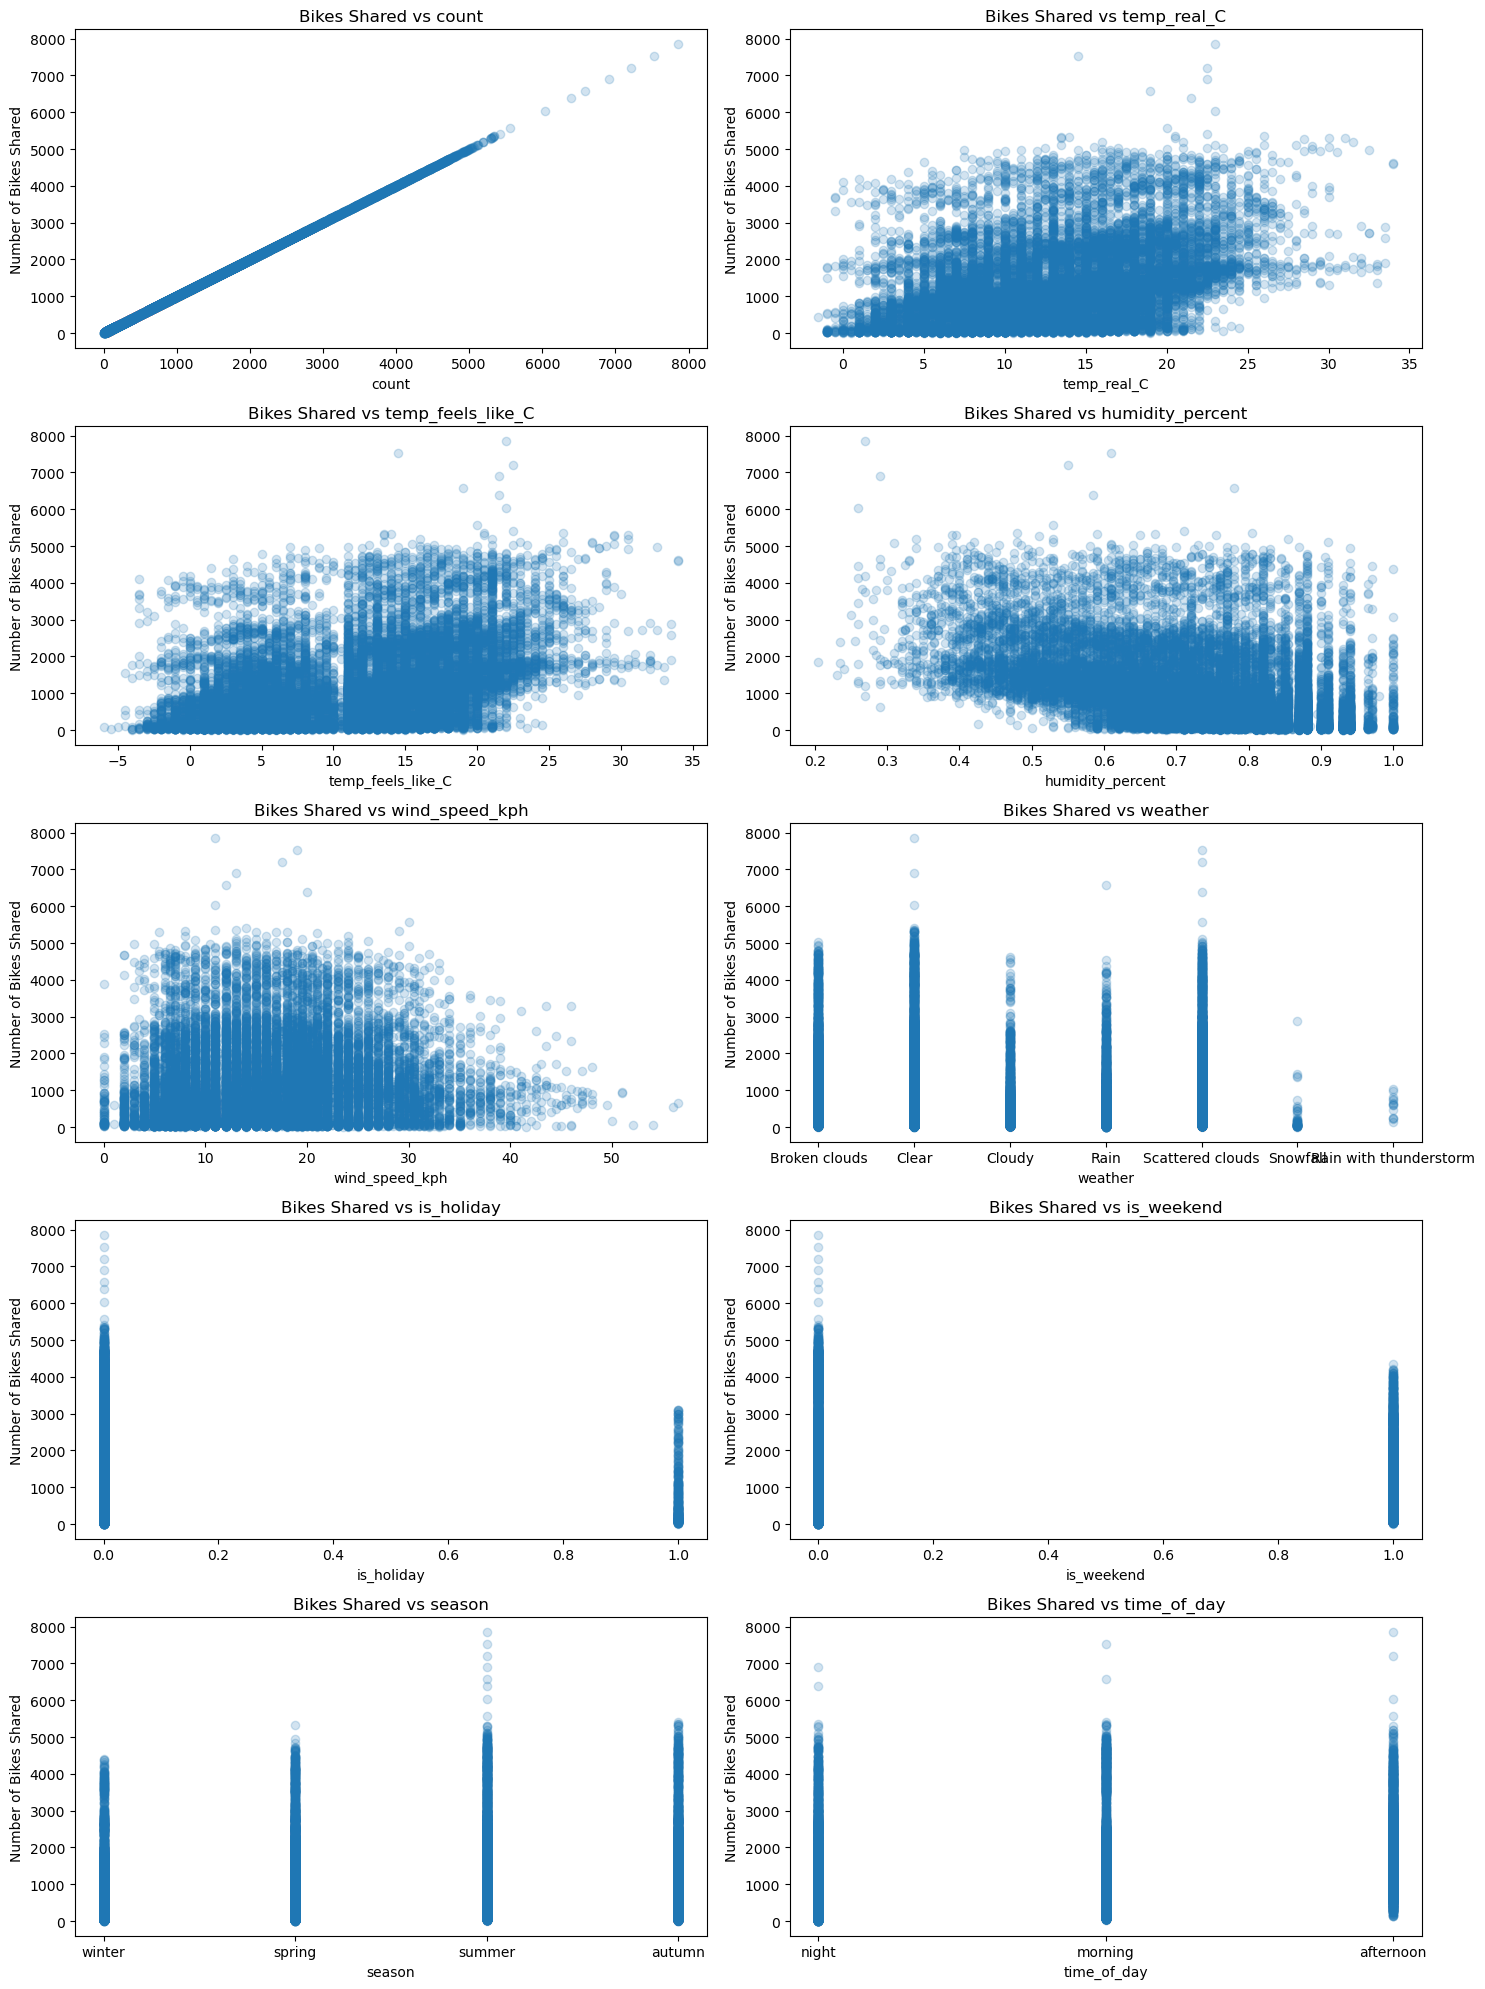

In [170]:
# create a 5 x 2 grid of subplots 
fig, axs = plt.subplots(5,2, figsize = (15,20))

# flatten array to make easier to access each subplot
axs = axs.ravel()

# loop over each column in the dataframe and plot a histogram
for i,column in enumerate(bikes.columns):
    axs[i].scatter(bikes[column], bikes["count"], alpha = 0.2)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Number of Bikes Shared")
    axs[i].set_title('Bikes Shared vs {}'.format(column))
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

#### Key takeaways:

- Less bikes are shared on holidays.
- More bikes are shared on weekdays. 
- More bikes are shared during the Summer and Autumn seasons.
- Fewer people do bike sharing when wind speeds are high.

## 2. Data Exploration

In [171]:
# Create a new dataframe which changes the frequency of the data to daily
bikes_daily = bikes.resample("D").sum()
bikes_daily.head()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend
time,,,,,,,
2015-01-04,9234,59.5,15.5,22.625,180.0,0.0,24.0
2015-01-05,20372,193.0,161.0,19.275,212.5,0.0,0.0
2015-01-06,20613,188.5,128.0,18.935,384.0,0.0,0.0
2015-01-07,21064,171.5,103.5,17.965,454.5,0.0,0.0
2015-01-08,15601,234.0,187.0,19.035,491.5,0.0,0.0


In [172]:
# Group data by day of the week and plot the count of avg number of bikes shares

# Group the data by day of week and get the mean of 'count' column
bikes_weekday = bikes_daily.groupby(bikes_daily.index.dayofweek).mean()

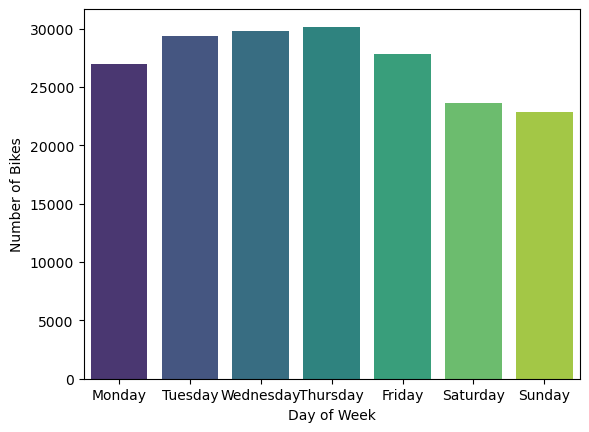

In [173]:
g = sns.barplot(x=bikes_weekday.index, 
           y= "count",
           data = bikes_weekday,
           palette="viridis")
g.set(xlabel = "Day of Week",
        ylabel = "Number of Bikes")
g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.show()

#### More bikes shared throught workdays compared to weekends, suggesting that bike sharing is commonly used for commuting to work.

In [174]:
# Going further and looking at how the number of bike shares evolve thorught a work day

# Creating a new dataframe where only the observations from workdays are included

bikes_workday = bikes[(bikes["is_weekend"]) == 0 & (bikes["is_holiday"] == 0)]

In [175]:
# Group data by hour of day

bikes_workday_hourly = bikes_workday.groupby(bikes_workday.index.hour).mean()

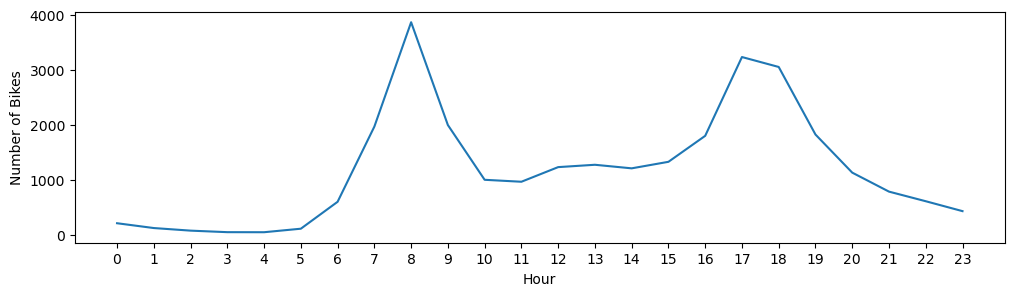

In [176]:
# Plot the average number of bike shares for each hour in a workday

fig = plt.figure(figsize = (12,3))

g = sns.lineplot(x = bikes_workday_hourly.index,
                 y = "count",
                 data = bikes_workday_hourly,
                 palette = "virids")
g.set(xticks=bikes_workday_hourly.index.values,
      xlabel = "Hour",
      ylabel = "Number of Bikes")

plt.show()

#### The peacks in number of bike sharing happens at 8AM and 5PM, confirmming our assumption that bikes are used the most for work commuting.

In [177]:
# Looking at the number of bike sharing for weekends and during holidays

# Creating a dataframe for weekends only
bikes_weekends = bikes[(bikes["is_weekend"] == 1) & (bikes["is_holiday"] == 0)]

# Creating a dataframe for holidays only
bikes_holiday = bikes[bikes["is_holiday"]==1]

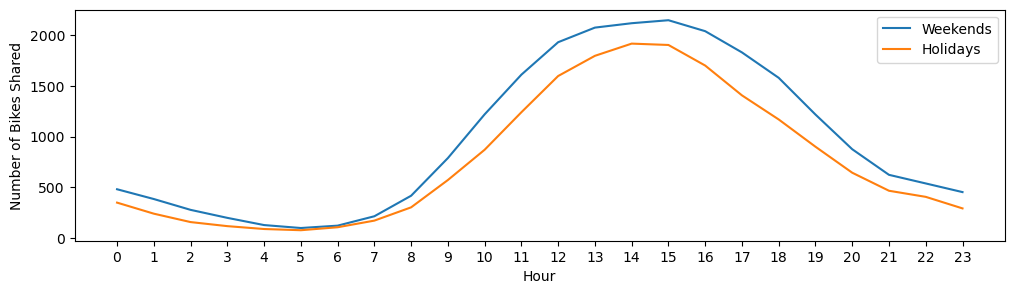

In [178]:
# Creating the lineplots for the two datasets

fig = plt.figure(figsize = (12,3))

g = sns.lineplot(x = bikes_weekends.index.hour,
                 y = "count",
                 data = bikes_weekends,
                 ci = None,
                 label = "Weekends",
                 palette = "viridis")
g = sns.lineplot(x = bikes_holiday.index.hour,
                 y = "count",
                 data = bikes_holiday,
                 ci = None,
                 label = "Holidays",
                 palette = "viridis")
g.set(xticks = range(0,24),
      xlabel = "Hour",
      ylabel = "Number of Bikes Shared")

plt.show()

#### On weekends and on holidays, the peack happens at noon

In [179]:
# Looking at the number of shared bikes for each season

# Group by season and take the average number of bikes

bikes_season = bikes.groupby("season")["count"].mean().reset_index().sort_values(by="count")

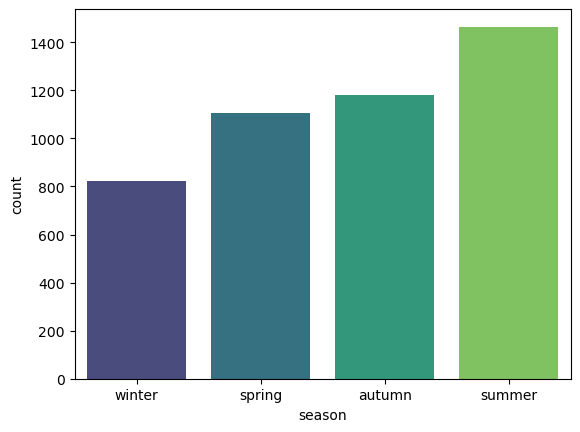

In [180]:
# Plot 
fig = plt.figure()

g = sns.barplot(x="season",
                y="count",
                data = bikes_season, 
               palette="viridis")

#### As expected, summer is the season with the highest amount of bike shares

In [181]:
# Looking at the number of shared bikes for the different weather types

bikes_weather = bikes.groupby("weather")["count"].mean().reset_index().sort_values(by="count")

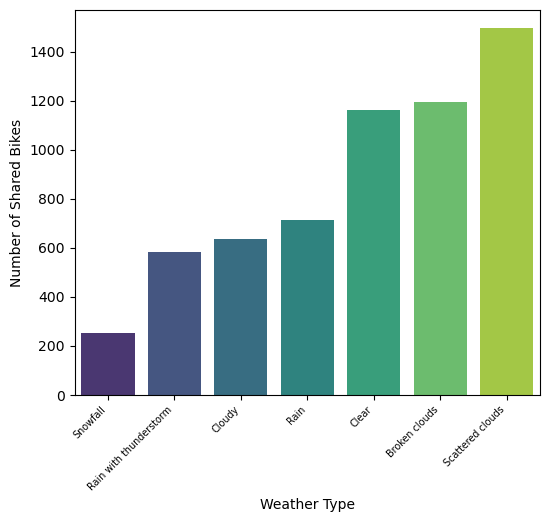

In [182]:
# Plotting the number of bikes shared for each type of weather

fig = plt.figure(figsize = (6,5))

g = sns.barplot(x="weather",
               y="count",
               data=bikes_weather,
               palette = "viridis")

g.set(xlabel = "Weather Type",
     ylabel = "Number of Shared Bikes")

plt.xticks(rotation=45, ha = 'right', fontsize = 'x-small')

plt.show()

#### As expected, the number of shared bikes is the highest for clear, broken clouds and scattered clouds weather, which indicate good weather conditions.

In [183]:
# Checking the relationship between the temperature and the number of shared bikes

bikes_temp = bikes.groupby(["temp_real_C"])["count"].mean().reset_index()

bikes_temp_feels_like = bikes.groupby(["temp_feels_like_C"])["count"].mean().reset_index()

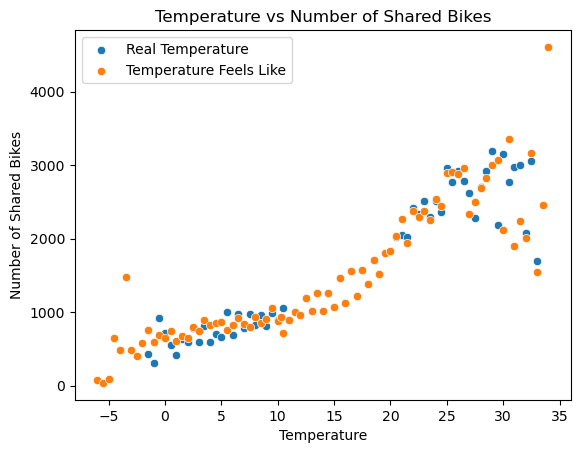

In [184]:
g = sns.scatterplot(x="temp_real_C",
             y="count",
             data=bikes_temp,
             label = "Real Temperature")

g = sns.scatterplot(x="temp_feels_like_C",
                   y="count",
                   data=bikes_temp_feels_like,
                   label = "Temperature Feels Like")
            

g.set(xlabel = "Temperature",
     ylabel= "Number of Shared Bikes",
     title = "Temperature vs Number of Shared Bikes")

plt.show()

#### We see a positive correlation between the number of shared bikes and the tempereture, for both workdays and weekends. 

In [185]:
# Checking the relationship between humidity percentages and number of shared bikes

bikes_humidity = bikes.groupby(["humidity_percent"])["count"].mean().reset_index()



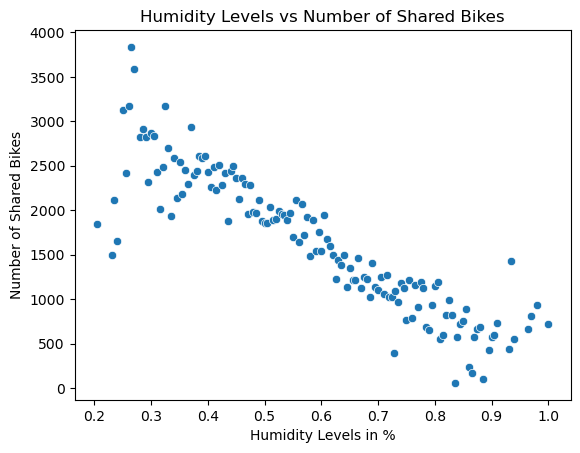

In [186]:
g = sns.scatterplot(x="humidity_percent",
             y="count",
             data=bikes_humidity)

g.set(xlabel = "Humidity Levels in %",
     ylabel= "Number of Shared Bikes",
     title = "Humidity Levels vs Number of Shared Bikes")

plt.show()

#### We see a negative correlation between humidity levels and number of shared bikes. An increase in humidity levels results in a decrease in the number of shared bikes.

In [187]:
# Looking at the number of shared bikes for different wind speeds

bikes_wind = bikes.groupby(["wind_speed_kph"])["count"].mean().reset_index()


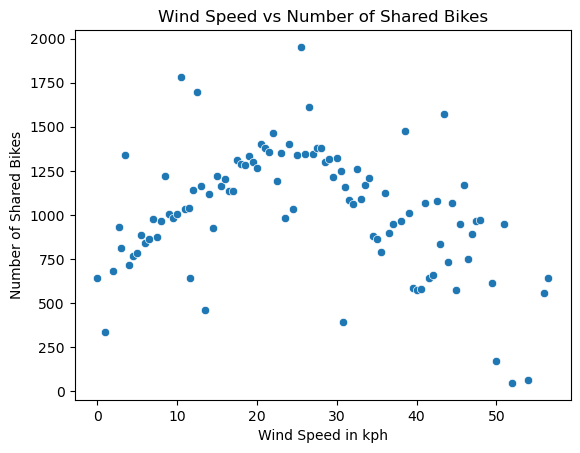

In [188]:
g = sns.scatterplot(x="wind_speed_kph",
             y="count",
             data=bikes_wind)

g.set(xlabel = "Wind Speed in kph",
     ylabel= "Number of Shared Bikes",
     title = "Wind Speed vs Number of Shared Bikes")

plt.show()

#### The plot suggests a normal distribution between the Wind Speed variable and the number of shared bikes, with no correlation evidence between the two variables.

## 3. Time-Series Analysis

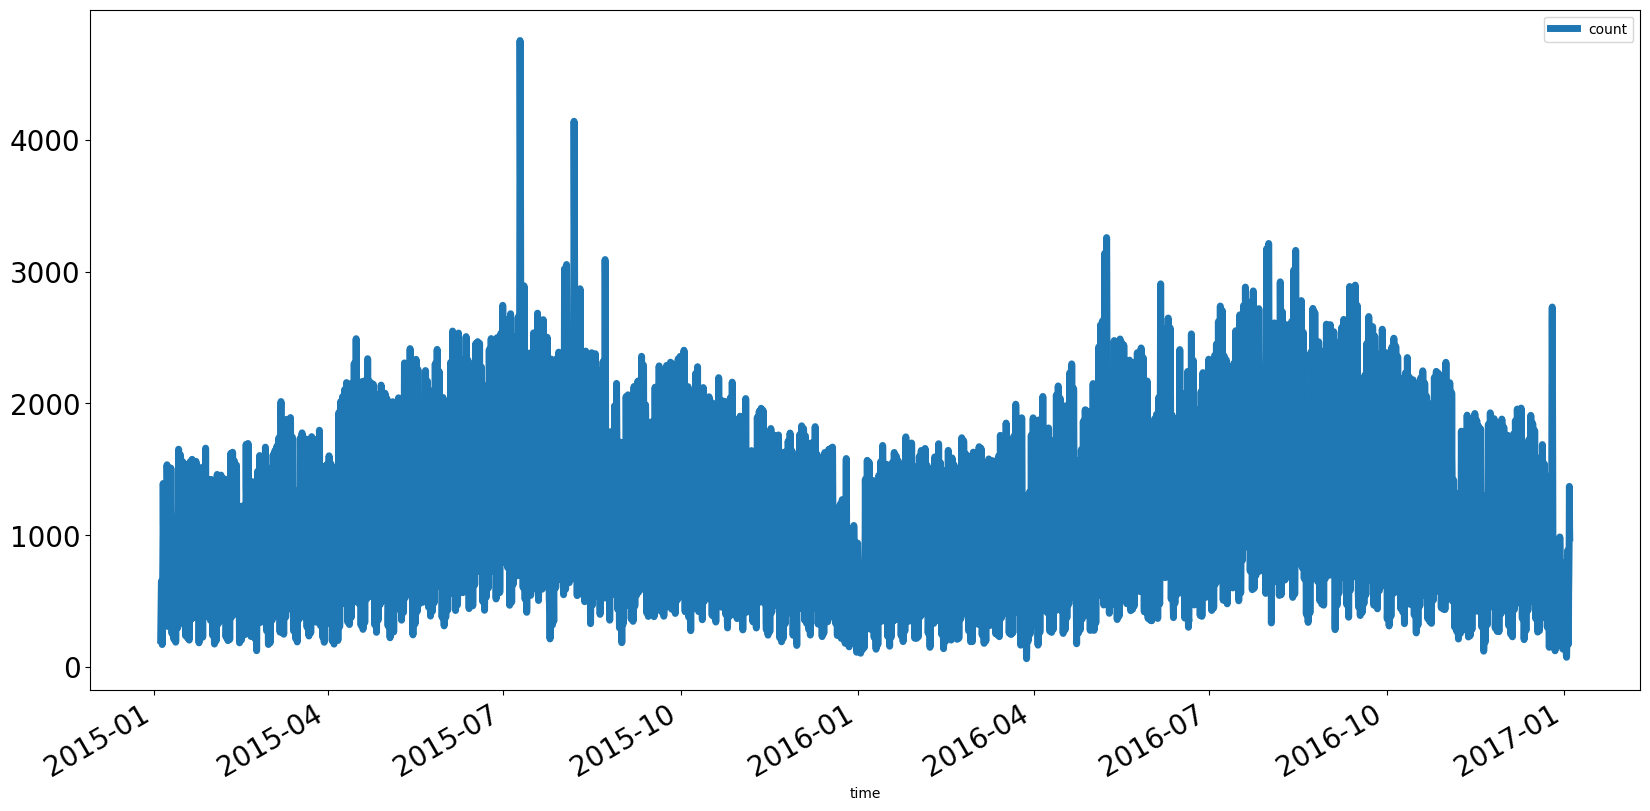

In [189]:
# Looking at the rolling mean for the number of shared bikes over time
shared_bikes = bikes[["count"]]
shared_bikes.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

#### There is no seasonality over a long period of time, so it's best to look at a lower level. We see two peacks in the chart, which will be looked over later in the process.

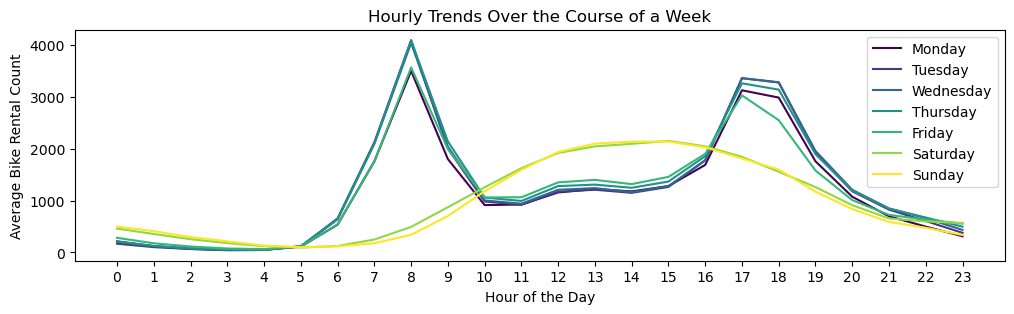

In [190]:
# Resample data to hourly frequency
hourly_counts = bikes.resample('H').mean()

# Create a line plot with hue representing the day of the week
fig = plt.figure(figsize=(12, 3))
g = sns.lineplot(x=hourly_counts.index.hour, y='count', hue=hourly_counts.index.dayofweek, data=hourly_counts, palette='viridis', ci=None)
g.set(xticks=range(0,24),
      xlabel="Hour of the Day",
      ylabel="Average Bike Rental Count",
      title="Hourly Trends Over the Course of a Week")
g.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#### The time series plot indicates the presence of daily seasonality, meaning that there is a recurring pattern that repeats over a 24-hour period. During the weekdays, there are two peaks - one in the morning, followed by a dip, and then another peak later in the day. On the weekends, there is a single peak in the middle of the day.

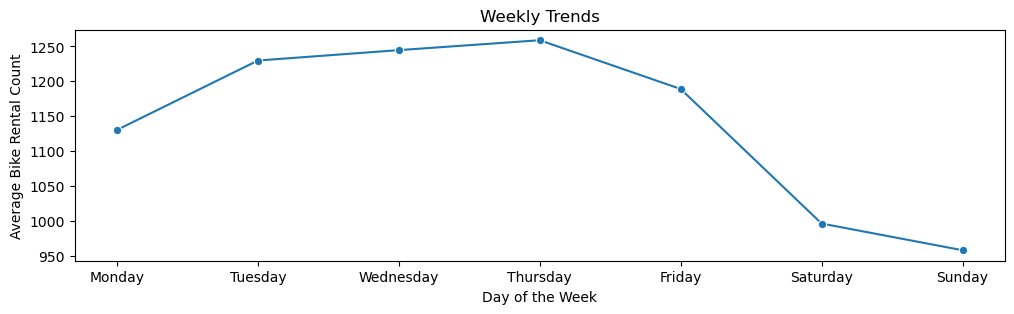

In [191]:
# Resample data to daily frequency
daily_trends = bikes.resample('D').mean()

# Create a line plot
fig = plt.figure(figsize=(12, 3))
g = sns.lineplot(x=daily_trends.index.dayofweek, y='count', data=daily_trends, marker='o', ci = None)
g.set(title="Weekly Trends",
      xlabel="Day of the Week",
      ylabel="Average Bike Rental Count")
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
plt.show()

#### The time series plot indicates the presence of weekly seasonality, meaning that there is a recurring pattern that repeats over a 7-day period. As expected, the average number of bikes rented is highest during workdays and lowest in weekends.

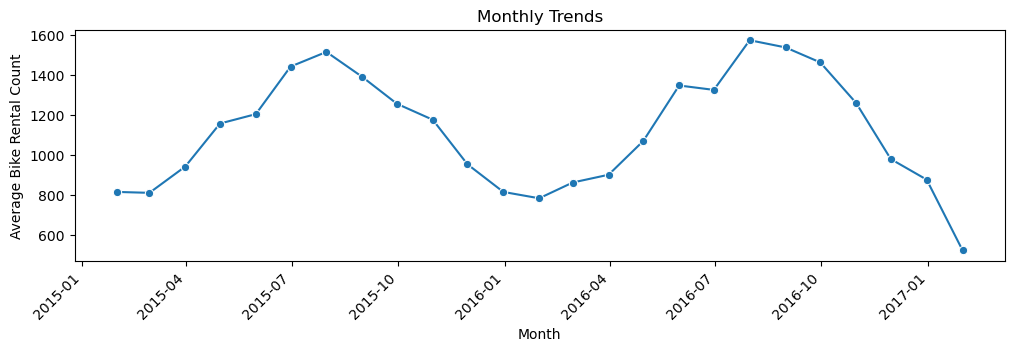

In [192]:
# Resample data to monthly frequency
monthly_trends = bikes.resample('M').mean()

# Create a line plot
fig = plt.figure(figsize=(12, 3))
g = sns.lineplot(x=monthly_trends.index, y='count', data=monthly_trends, marker='o')
g.set(title="Monthly Trends",
      xlabel = "Month",
      ylabel = "Average Bike Rental Count")
plt.xticks(rotation=45, ha='right') 
plt.show()

#### From this monthly time series plot we can see that there is Yearly Seasonality. We can see that the level of bike sharing is lowest during the winter and spring months (December - April) and highest during the summer months, which is consistent with the patterns observed in the scatter plots.

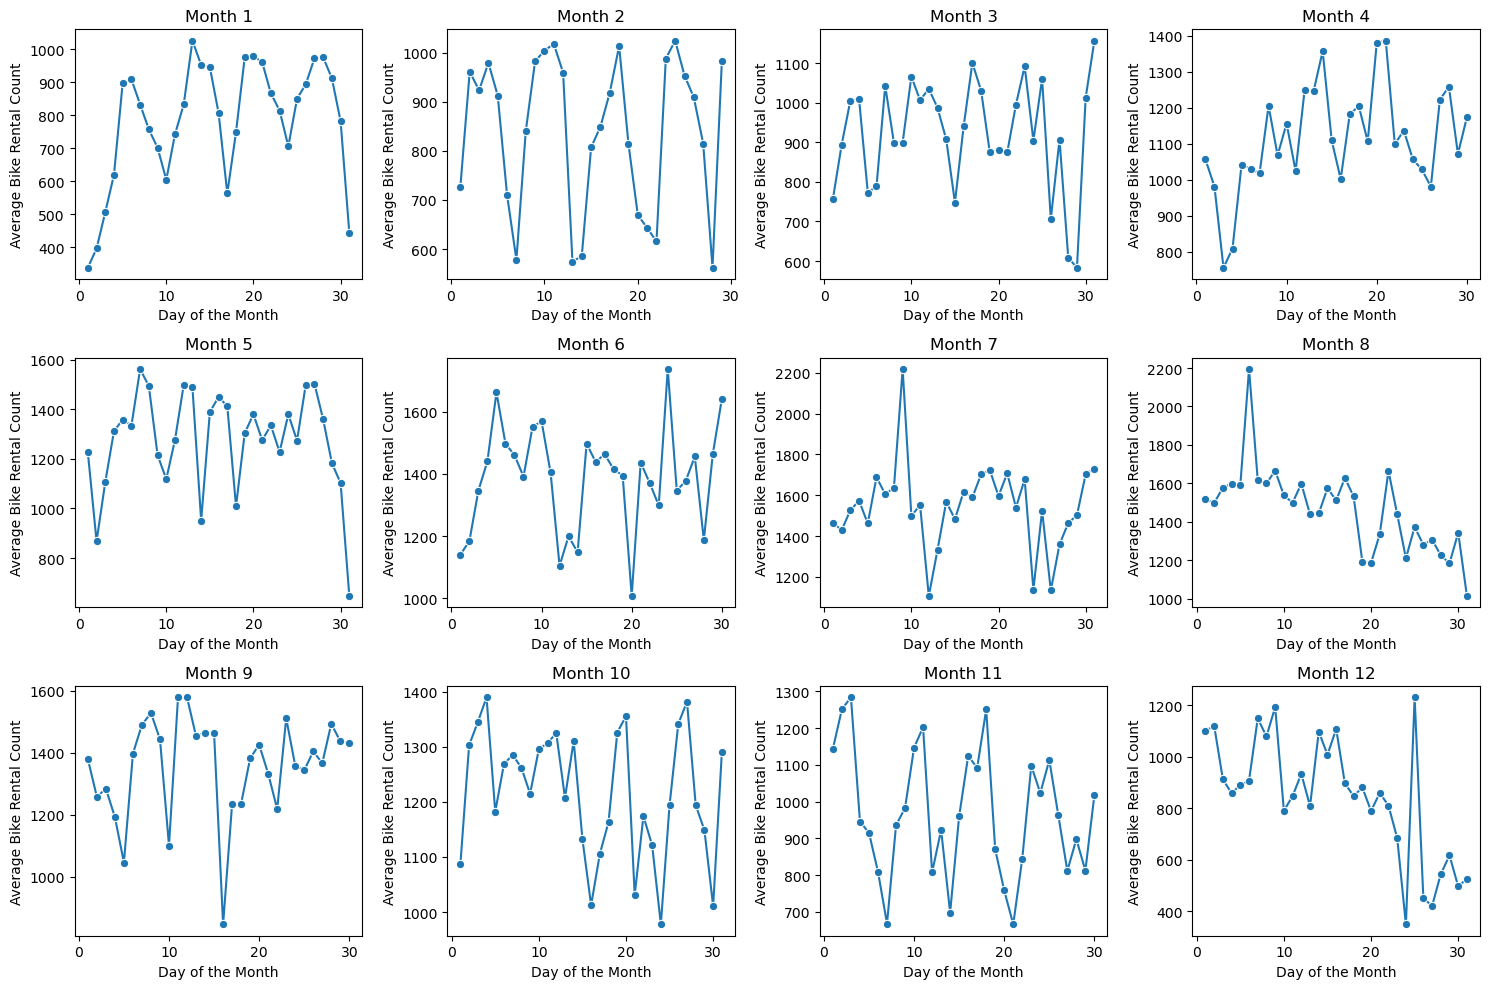

In [193]:
# Extract month and day of the month
bikes['month'] = bikes.index.month
bikes['day_of_month'] = bikes.index.day

# Create subplots for each month
plt.figure(figsize=(15, 10))
for month in range(1, 13):
    plt.subplot(3, 4, month)  # 3 rows, 4 columns for each month
    month_data = bikes[bikes['month'] == month]
    sns.lineplot(x='day_of_month', y='count', data=month_data, marker='o', ci = None)
    plt.title(f'Month {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Average Bike Rental Count')
    plt.tight_layout()

plt.show()

#### Out of these plots, there isn't any noticeable monthly seasonality. 

In [194]:
bikes

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,time_of_day,month,day_of_month
time,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,night,1,4
2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,night,1,4
2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,night,1,4
2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,night,1,4
2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,night,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter,night,1,3
2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter,night,1,3
2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter,night,1,3


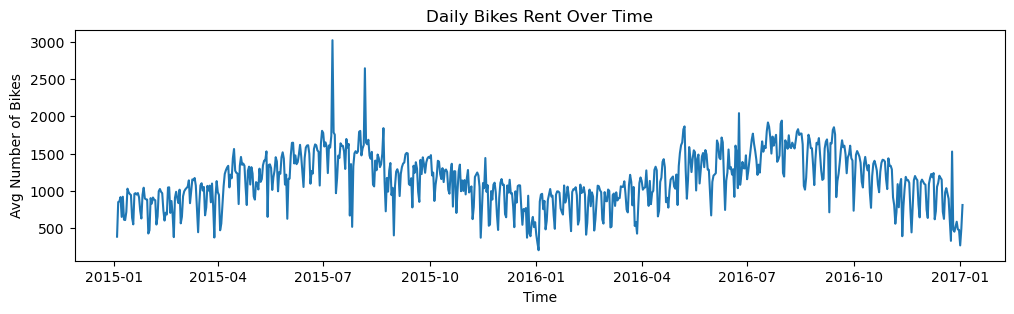

In [195]:
# Plotting daily trends to identify which are the days with the highest peaks and check if there is something unusual

fig = plt.figure(figsize=(12,3))
g = sns.lineplot(x = daily_trends.index, y = "count", data = daily_trends)
g.set(title="Daily Bikes Rent Over Time",
      xlabel = "Time",
      ylabel = "Avg Number of Bikes")
plt.show()

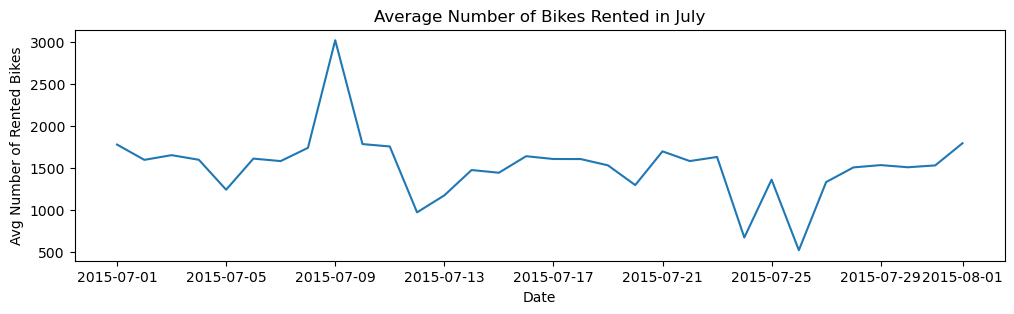

In [196]:
# Looking at the first peak, which from the previous plot seems to be between July and August

start_date = "2015-07-01"
end_date = "2015-08-01"

daily_data_first_peak = daily_trends.loc[start_date:end_date]

fig = plt.figure(figsize=(12,3))
g = sns.lineplot(x = daily_data_first_peak.index, y = "count", data = daily_data_first_peak)
g.set(title = "Average Number of Bikes Rented in July",
      xlabel = "Date",
      ylabel = "Avg Number of Rented Bikes")
plt.show()

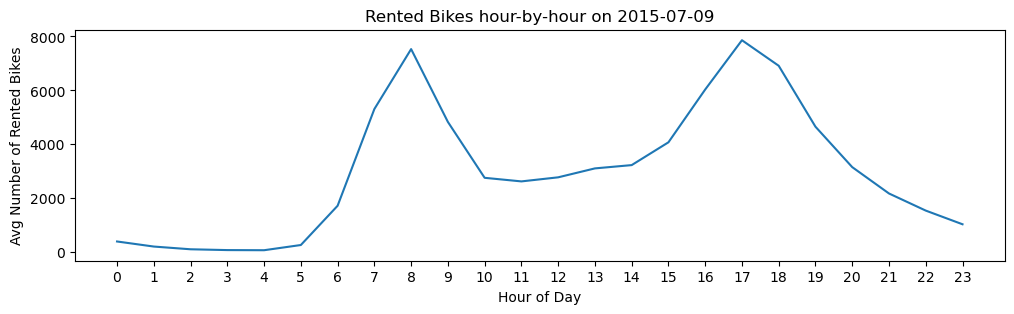

In [197]:
# Looking at the hourly trends for the date "2015-07-09", which seams to be the day where the peak was recorded

date = "2015-07-09"

first_peak = hourly_counts.loc[date]

fig = plt.figure(figsize=(12,3))
g=sns.lineplot(x=first_peak.index.hour, y="count", data=first_peak)
g.set(title = "Rented Bikes hour-by-hour on 2015-07-09",
      xlabel = "Hour of Day",
      ylabel = "Avg Number of Rented Bikes")
plt.xticks(range(24))
plt.show()

#### The time series plot suggests that the peak in shared bikes on July 9, 2015, does not appear to be an outlier. This conclusion is drawn from the hourly distribution of shared bikes on that day, which aligns with the consistent seasonal pattern observed on other days in our visualizations. The recurring pattern indicates peaks at 8 am and 5 pm. The elevated number of shared bikes on July 9 may be influenced by additional factors, and it doesn't necessarily indicate an anomaly in the established seasonal pattern.

# 4. Modelling

In [198]:
# Drop weather related columns due to absent data for the future

bikes = bikes.drop(["temp_real_C", "temp_feels_like_C", "humidity_percent", "wind_speed_kph", "weather"], axis = 1)

In [199]:
# We split our data into X, a 2D array of our features, andy, a 1D array of the target values 
X = bikes.drop(["count"], axis = 1)
y = bikes["count"]
print(X.shape, y.shape)

(17414, 6) (17414,)


In [200]:
# Convert categorical columns to dummy variables

X = pd.get_dummies(X)

In [201]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 21)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (13931, 11)
Shape of y_train: (13931,)
Shape of X_test: (3483, 11)
Shape of y_test: (3483,)


In [202]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [203]:
# Making predictions using Random Forest and Ensemble Averaging 

# Number of models to train
num_models = 5

# List to store predictions from individual models
predictions = []

# Train multiple models with different random seeds
for seed in range(num_models):
    model = RandomForestRegressor(random_state=seed)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)

# Ensemble predictions using averaging
y_pred_rf = np.mean(predictions, axis=0)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')

Mean Absolute Error: 676.4842858342687
Mean Squared Error : 916920.951218903
Root Mean Squared Error : 957.5598943245811


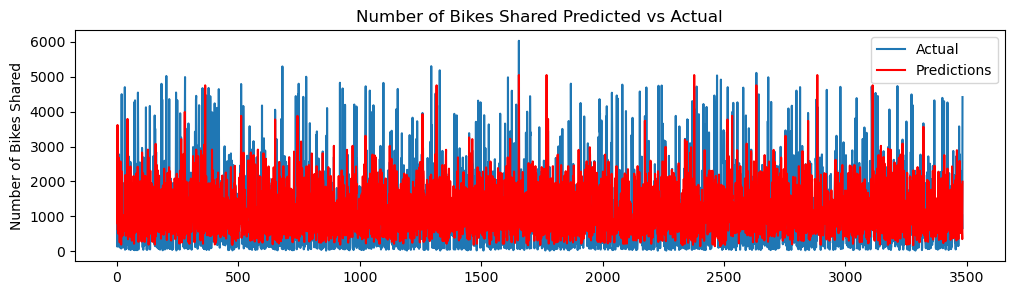

In [204]:
# Visualizing actual vs predicted values

fig = plt.figure(figsize = (12,3))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred_rf, label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

In [205]:
from sklearn.ensemble import GradientBoostingRegressor

# Number of models to train
num_models = 5

# List to store predictions from individual models
predictions = []

# Train multiple models with different random seeds
for seed in range(num_models):
    model = GradientBoostingRegressor(random_state=seed)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)

# Ensemble predictions using averaging
y_pred_gb = np.mean(predictions, axis=0)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')

Mean Absolute Error: 644.5843147299979
Mean Squared Error : 799080.4514772368
Root Mean Squared Error : 893.9129999486734


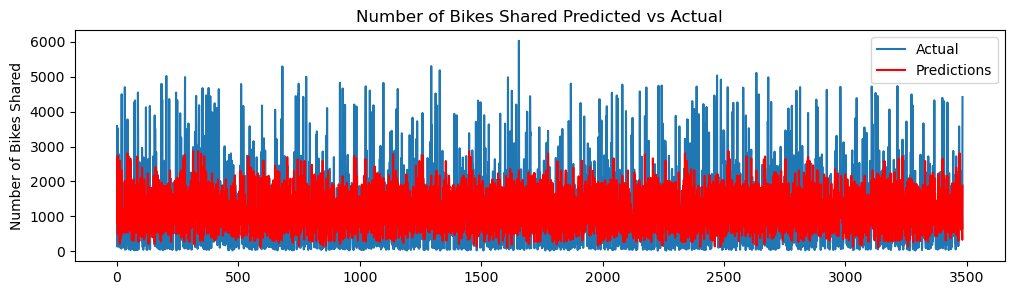

In [206]:
# Visualizing actual vs predicted values

fig = plt.figure(figsize = (12,3))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred_gb, label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

## 5. Feature Engineering

In [207]:
# Add new features to the dataset: hourly, daily, weekly, and monthly indicators

bikes['hour'] = bikes.index.hour
bikes['dayofweek'] = bikes.index.dayofweek
bikes['weekofyear'] = bikes.index.weekofyear
bikes['month'] = bikes.index.month

C:\Users\catal\AppData\Local\Temp\ipykernel_30340\3356738593.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  bikes['weekofyear'] = bikes.index.weekofyear


In [208]:
bikes

,count,is_holiday,is_weekend,season,time_of_day,month,day_of_month,hour,dayofweek,weekofyear
time,,,,,,,,,,
2015-01-04 00:00:00,182,0.0,1.0,winter,night,1,4,0,6,1
2015-01-04 01:00:00,138,0.0,1.0,winter,night,1,4,1,6,1
2015-01-04 02:00:00,134,0.0,1.0,winter,night,1,4,2,6,1
2015-01-04 03:00:00,72,0.0,1.0,winter,night,1,4,3,6,1
2015-01-04 04:00:00,47,0.0,1.0,winter,night,1,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,0.0,0.0,winter,night,1,3,19,1,1
2017-01-03 20:00:00,541,0.0,0.0,winter,night,1,3,20,1,1
2017-01-03 21:00:00,337,0.0,0.0,winter,night,1,3,21,1,1


In [209]:
# We split our data into X, a 2D array of our features, andy, a 1D array of the target values 
X = bikes.drop(["count"], axis = 1)
y = bikes["count"]
print(X.shape, y.shape)

(17414, 9) (17414,)


In [210]:
# Convert categorical columns to dummy variables

X = pd.get_dummies(X)

In [211]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 21)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (13931, 14)
Shape of y_train: (13931,)
Shape of X_test: (3483, 14)
Shape of y_test: (3483,)


In [212]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [213]:
# Making predictions using Random Forest and Ensemble Averaging 

# Number of models to train
num_models = 5

# List to store predictions from individual models
predictions = []

# Train multiple models with different random seeds
for seed in range(num_models):
    model = RandomForestRegressor(random_state=seed)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)

# Ensemble predictions using averaging
y_pred_rf = np.mean(predictions, axis=0)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')

Mean Absolute Error: 140.4013046224519
Mean Squared Error : 65695.42964423542
Root Mean Squared Error : 256.31119687644434


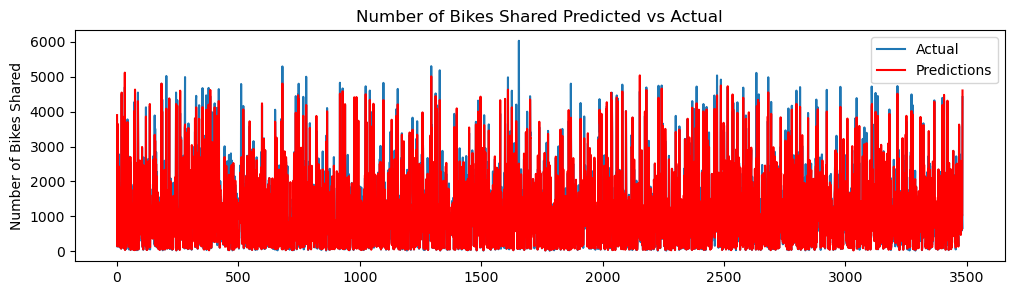

In [214]:
# Visualizing actual vs predicted values

fig = plt.figure(figsize = (12,3))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred_rf, label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

In [215]:
# Number of models to train
num_models = 5

# List to store predictions from individual models
predictions = []

# Train multiple models with different random seeds
for seed in range(num_models):
    model = GradientBoostingRegressor(random_state=seed)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)

# Ensemble predictions using averaging
y_pred_gb = np.mean(predictions, axis=0)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error : {mse}')
print(f'Root Mean Squared Error : {rmse}')

Mean Absolute Error: 250.135281002046
Mean Squared Error : 158534.93055774312
Root Mean Squared Error : 398.16445164999743


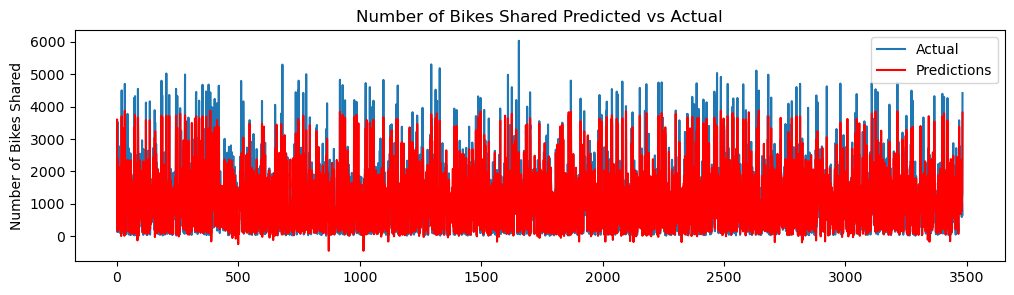

In [216]:
# Visualizing actual vs predicted values

fig = plt.figure(figsize = (12,3))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred_gb, label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

### After adding the new features, both models performed better, showing a significant inhancement in MAE, MSE and RMSE. With the new features, the Random Forest Regressor Model seems to perform better than Gradient Boosting Regressor. 